In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D
import matplotlib.pyplot as plt

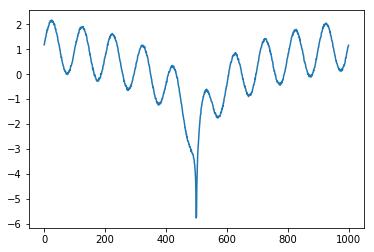

In [2]:
lp = np.linspace(-10*np.pi, 10*np.pi, 1000)
x  = np.sin(lp)+np.random.rand(1000)/10+np.log(np.abs(lp)/10)

plt.plot(x)

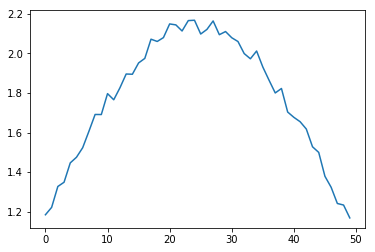

In [3]:
plt.plot(x[:50])

In [4]:
window_size = 20

model = Sequential()
model.add(Conv1D(5,3, activation = 'relu', input_shape = (window_size, 1)))
model.add(MaxPooling1D())
model.add(Conv1D(5,3, activation = 'relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mse', optimizer='adam')

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 5)             20        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 5)              0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 7, 5)              80        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 5)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 116
Trainable params: 116
Non-trainable params: 0
________________________________________________________

In [6]:
X = [x[start:start+window_size] for start in range(0, x.shape[0]-window_size)]
X = np.array(X)
print(X.shape)
X = np.expand_dims(X, axis=-1)
print(X.shape)

(980, 20)
(980, 20, 1)


In [7]:
Y = x[window_size:]

In [8]:
valid_split=0.2
test_split=0.1

# train-validation-test minták különválasztása
X_train = X[0:int(X.shape[0]*(1-valid_split-test_split))]
Y_train = Y[0:int(X.shape[0]*(1-valid_split-test_split))]
X_valid = X[int(X.shape[0]*(1-valid_split-test_split)):int(X.shape[0]*(1-test_split))]
Y_valid = Y[int(X.shape[0]*(1-valid_split-test_split)):int(X.shape[0]*(1-test_split))]
X_test  = X[int(X.shape[0]*(1-test_split)):]
Y_test  = Y[int(X.shape[0]*(1-test_split)):]

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
es = EarlyStopping(patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='model_1dcnn.hdf5', save_best_only=True, verbose=1)

model.fit(X_train, Y_train,
          validation_data=(X_valid,Y_valid),
          epochs=1000000000000,
          batch_size=16,
          shuffle=True,
          callbacks=[mcp,es])

model = load_model('model_1dcnn.hdf5')


Train on 686 samples, validate on 196 samples
Epoch 1/1000000000000
686/686 [==============================] - 0s 335us/step - loss: 2.2157 - val_loss: 0.8383

Epoch 00001: val_loss improved from inf to 0.83832, saving model to model_1dcnn.hdf5
Epoch 2/1000000000000
686/686 [==============================] - 0s 116us/step - loss: 1.6183 - val_loss: 0.6485

Epoch 00002: val_loss improved from 0.83832 to 0.64854, saving model to model_1dcnn.hdf5
Epoch 3/1000000000000
686/686 [==============================] - 0s 117us/step - loss: 1.3558 - val_loss: 0.3644

Epoch 00003: val_loss improved from 0.64854 to 0.36443, saving model to model_1dcnn.hdf5
Epoch 4/1000000000000
686/686 [==============================] - 0s 112us/step - loss: 1.1742 - val_loss: 0.1890

Epoch 00004: val_loss improved from 0.36443 to 0.18902, saving model to model_1dcnn.hdf5
Epoch 5/1000000000000
686/686 [==============================] - 0s 113us/step - loss: 1.0744 - val_loss: 0.1535

Epoch 00005: val_loss improved 


Epoch 00040: val_loss improved from 0.01200 to 0.01091, saving model to model_1dcnn.hdf5
Epoch 41/1000000000000
686/686 [==============================] - 0s 113us/step - loss: 0.3470 - val_loss: 0.0083

Epoch 00041: val_loss improved from 0.01091 to 0.00832, saving model to model_1dcnn.hdf5
Epoch 42/1000000000000
686/686 [==============================] - 0s 107us/step - loss: 0.3390 - val_loss: 0.0078

Epoch 00042: val_loss improved from 0.00832 to 0.00777, saving model to model_1dcnn.hdf5
Epoch 43/1000000000000
686/686 [==============================] - 0s 108us/step - loss: 0.3307 - val_loss: 0.0076

Epoch 00043: val_loss improved from 0.00777 to 0.00762, saving model to model_1dcnn.hdf5
Epoch 44/1000000000000
686/686 [==============================] - 0s 111us/step - loss: 0.3227 - val_loss: 0.0074

Epoch 00044: val_loss improved from 0.00762 to 0.00744, saving model to model_1dcnn.hdf5
Epoch 45/1000000000000
686/686 [==============================] - 0s 108us/step - loss: 0.3155

In [10]:
preds = model.predict(X_test)

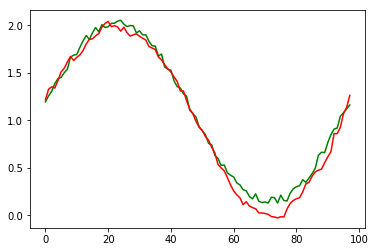

In [11]:
plt.plot(Y_test, c='g')
plt.plot(preds, c='r')
plt.show()